# Non-parametric analysis of interval-censored failure data
This example demonstrates non-parametric reliability analysis of interval-censored failure data. 

In [1]:
# Following to allow use of ramsmod library.
import sys
!{sys.executable} -m pip install ramsmod

### Load failure data 1
A set of interval-censored failure data from the file [interval-censored.csv](../ramsmod/datasets/interval-censored.csv) will be analysed first. This file is in CSV (comma-separated values) format, with three columns giving the number of the observations and corresponding lower bounds (tmin) and upper bounds (tmax) of the intervals (tmin, tmax] in which failure could have occurred. This will be loaded into a Pandas DataFrame for analysis, using the first column as the index.

In [2]:
import pandas as pd
from ramsmod.datasets import *

fd1 = load_interval_censored_data()
fd1

,tmin,tmax
Observation #,,
1,10.0,15.0
2,55.0,inf
3,30.0,35.0
4,15.0,20.0
5,30.0,35.0
6,20.0,25.0
7,45.0,inf
8,0.0,10.0
9,0.0,15.0


### Visualise failure times
To visualise this data set, the `plot_interval_censored` function from the plotting module of the ramsmod library will be used. This produces a plot of the intervals in which failure occurred for each observation in the data, along with the type of censoring. This function has two required arguments, the first being a Pandas Series with the lower bound times of the failure intervals for each observation and the second being a Pandas Series of the same size with the upper bound times. You can also optionally pass it an `ax` keyword argument for the Matplotlib axes to plot on (otherwise it will create a new one) and a `show_legend` keyword argument that tells it whether to display a legend on the plot (default is True). The function returns the axes with the plotted data.

<AxesSubplot:xlabel='Time', ylabel='Observation #'>

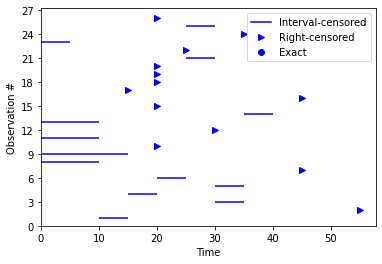

In [3]:
from ramsmod.plotting import plot_interval_censored

plot_interval_censored(fd1['tmin'], fd1['tmax'])

From the plot, we can see there are 26 observations in the failure data and that the intervals in which failures were observed or times they were right-censored.

### Fitting reliability function with Turnbull method
Next, we will fit a reliability function to the failure data using the Turnbull method. To do this, we will use the `turnbull_fit` method from the fitting module of the ramsmod library. The function has two required arguments, the first being a Pandas Series with the lower bound times of the failure intervals for each observation and the second being a Pandas Series of the same size with the upper bound times. It also has a keyword argument `tol` that defines the maximum difference between reliability values in successive iterations of the fitting procedure for convergence, the default value is 0.001. The function returns a Pandas DataFrame with the fitting results.

In [4]:
from ramsmod.fitting import turnbull_fit

tb_fd1 = turnbull_fit(fd1['tmin'], fd1['tmax'])
tb_fd1

,t,R
1,0.0,1.000000
2,5.0,0.816062
3,10.0,0.815385
4,15.0,0.769231
5,20.0,0.728745
6,25.0,0.668016
7,30.0,0.534413
8,35.0,0.381724
9,40.0,0.286293
10,45.0,0.286291


The index of the DataFrame gives the indices of the time grid points (from 1 to $m$ where $m$ is the number of distinct interval bound times) used in the Turnbull method. The first column, labelled 't', gives the time values for these time grid points whilst the second column, labelled 'R', gives the corresponding reliability estimates. 
### Plot reliability curve
The reliability estimates can now be plotted using the `plot_np_reliability` function from the plotting module of the ramsmod library. This function is described in the [example for right-censored data](right-censored-example.ipynb).

<AxesSubplot:xlabel='$t$', ylabel='$\\widehat R(t)$'>

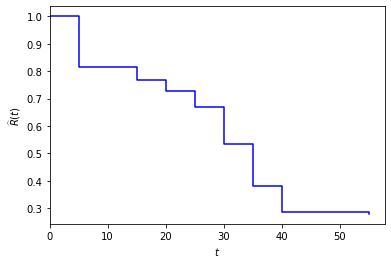

In [5]:
from ramsmod.plotting import plot_np_reliability

plot_np_reliability(tb_fd1['t'], tb_fd1['R'])

The plotted curve shows that reliability is estimated to falls to approximately 0.8 after 10 time units and approximately 0.5 by 35 time units (i.e. the estimated median failure time).
### Load and analyse data set 2
A second set of interval censored failure data, from the file [interval-censored-2.csv](../ramsmod/datasets/interval-censored-1.csv), will now be loaded into a DataFrame and analysed in the same way using the Turnbull method.

In [6]:
fd2 = load_interval_censored_data2()
fd2

,tmin,tmax
Observation #,,
1,0,15.0
2,35,inf
3,0,10.0
4,15,20.0
5,10,15.0
6,15,20.0
7,0,10.0
8,35,40.0
9,15,20.0


<AxesSubplot:xlabel='Time', ylabel='Observation #'>

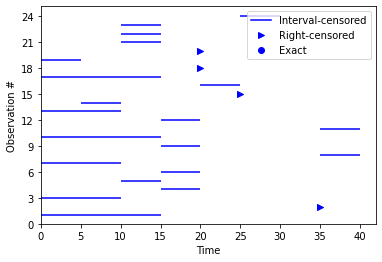

In [7]:
plot_interval_censored(fd2['tmin'], fd2['tmax'])

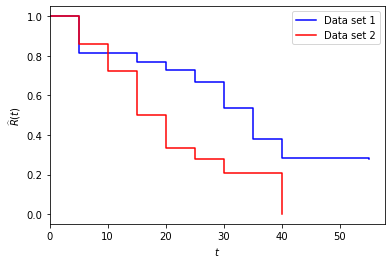

In [8]:
import matplotlib.pyplot as plt

tb_fd2 = turnbull_fit(fd2['tmin'], fd2['tmax'])

plot_np_reliability(tb_fd1['t'], tb_fd1['R'], color='blue', label='Data set 1')
plot_np_reliability(tb_fd2['t'], tb_fd2['R'], color='red', label='Data set 2')
plt.legend()

Plotting the reliability curves estimated from the two sets of failure data on the same axes suggests that data set 2 may be from a population with lower reliability than data set 1.
### Perform Mantel test to compare reliability
To see if this difference is statistically significant, a Mantel test will be performed at the 5% significance level. To do this the `mantel_test` function from the stats module of the ramsmod library will be used. This function takes four required arguments that are all Pandas DataSeries: the lower bounds for the failure intervals of the group 1 observations, the upper bounds for the failure intervals of the group 1 observations, the lower bounds for the failure intervals of the group 2 observations, and the upper bounds for the failure intervals of the group 2 observations. It returns a tuple of a DataFrame giving the values from the Mantel test calculation corresponding to each observation (first those from group 1, followed by those from group 2), the value of the Mantel test statistic (W), the estimated variance, and the P-value for the test.

In [9]:
from ramsmod.stats import mantel_test


table, w, var, p = mantel_test(fd1['tmin'], fd1['tmax'], fd2['tmin'], fd2['tmax'])
print(f'Mantel test statistic (W): {w:.2f}, Estimated variance: {var:.3f}, P-value: {p:.3f}')
table.head()

Mantel test statistic (W): 228.00, Estimated variance: 8842.462, P-value: 0.015


,t_min,t_max,later,earlier,v
Observation #,,,,,
1,55.0,inf,9.0,32.0,-23.0
2,30.0,35.0,33.0,0.0,33.0
3,15.0,20.0,28.0,8.0,20.0
4,30.0,35.0,18.0,26.0,-8.0
5,20.0,25.0,28.0,8.0,20.0


Therefore, the null hypothesis that the two groups have the same reliability is rejected at the 5% significance level because the p-Value from the Mantel test of 0.015 is less than 0.050. Together with the reliability curves plot, the conclusion is therefore that group 2 has lower reliability than group 1.